<a href="https://colab.research.google.com/github/Sokol57/SF/blob/Sokol57-module-2/project_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind


pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('https://lms.skillfactory.ru/assets/courseware/v1/425d6864db937e4ebabc972e581769ab/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/stud_math.csv')

In [3]:
def f_IQR(data:pd.DataFrame, i:str):
    IQR = data[i].quantile(0.75) - data[i].quantile(0.25)
    perc25 = data[i].quantile(0.25)
    perc75 = data[i].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    data[i].loc[data[i].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 20, label = 'IQR')

    
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud2.loc[stud2.loc[:, column].isin(stud2.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

    
def get_stat_dif(column):
    cols = stud2.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud2.loc[stud2.loc[:, column] == comb[0], 'score'], 
                        stud2.loc[stud2.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
def lookin(data:pd.DataFrame):
    for i in data.columns:
        print(i,': ', data[i].dtype,': {}'.format(data[i].unique()))

In [4]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
null_data = stud.isnull().sum()
null_data[null_data>0]/stud.count() #доля пропущенных значений по столбцам. Не превышает 13%, будем заполнять.

Fedu                   0.064690
Fjob                   0.100279
Medu                   0.007653
Mjob                   0.050532
Pstatus                0.128571
absences               0.031332
activities             0.036745
address                0.044974
age                         NaN
failures               0.058981
famrel                 0.073370
famsize                0.073370
famsup                 0.109551
freetime               0.028646
goout                  0.020672
guardian               0.085165
health                 0.039474
higher                 0.053333
internet               0.094183
nursery                0.042216
paid                   0.112676
reason                 0.044974
romantic               0.085165
school                      NaN
schoolsup              0.023316
score                  0.015424
sex                         NaN
studytime              0.018041
studytime, granular    0.018041
traveltime             0.076294
dtype: float64

In [6]:
#Посмотрим соответсвие присвоенных типов содержимому
lookin(stud)

school :  object : ['GP' 'MS']
sex :  object : ['F' 'M']
age :  int64 : [18 17 15 16 19 22 20 21]
address :  object : ['U' nan 'R']
famsize :  object : [nan 'GT3' 'LE3']
Pstatus :  object : ['A' nan 'T']
Medu :  float64 : [ 4.  1.  3.  2. nan  0.]
Fedu :  float64 : [ 4.  1.  2.  3. 40. nan  0.]
Mjob :  object : ['at_home' 'health' 'other' 'services' 'teacher' nan]
Fjob :  object : ['teacher' 'other' nan 'health' 'services' 'at_home']
reason :  object : ['course' 'other' 'home' 'reputation' nan]
guardian :  object : ['mother' 'father' 'other' nan]
traveltime :  float64 : [ 2.  1.  3. nan  4.]
studytime :  float64 : [ 2.  3.  1. nan  4.]
failures :  float64 : [ 0.  3. nan  2.  1.]
schoolsup :  object : ['yes' 'no' nan]
famsup :  object : ['no' 'yes' nan]
paid :  object : ['no' nan 'yes']
activities :  object : ['no' 'yes' nan]
nursery :  object : ['yes' 'no' nan]
studytime, granular :  float64 : [ -6.  -9.  -3.  nan -12.]
higher :  object : ['yes' nan 'no']
internet :  object : [nan 'yes

In [7]:
#полагаю что Fedu = 40 опечатка от 4. заменим
stud['Fedu'][stud['Fedu'] == 40.] = 4.


#определяем тип данных для понимания того каким способом заменять пропуски. Числовые медианой, категориальные модой. 

for i in stud.columns:
    if stud[i].dtype == 'float64':
        stud[i].fillna(stud[i].median(), inplace = True)
    else:
        stud[i].fillna(stud[i].mode()[0], inplace = True)

#смотрим результат
for i in stud.columns:
    print(i,': ', stud[i].dtype,': {}'.format(stud[i].unique()))

school :  object : ['GP' 'MS']
sex :  object : ['F' 'M']
age :  int64 : [18 17 15 16 19 22 20 21]
address :  object : ['U' 'R']
famsize :  object : ['GT3' 'LE3']
Pstatus :  object : ['A' 'T']
Medu :  float64 : [4. 1. 3. 2. 0.]
Fedu :  float64 : [4. 1. 2. 3. 0.]
Mjob :  object : ['at_home' 'health' 'other' 'services' 'teacher']
Fjob :  object : ['teacher' 'other' 'health' 'services' 'at_home']
reason :  object : ['course' 'other' 'home' 'reputation']
guardian :  object : ['mother' 'father' 'other']
traveltime :  float64 : [2. 1. 3. 4.]
studytime :  float64 : [2. 3. 1. 4.]
failures :  float64 : [0. 3. 2. 1.]
schoolsup :  object : ['yes' 'no']
famsup :  object : ['no' 'yes']
paid :  object : ['no' 'yes']
activities :  object : ['no' 'yes']
nursery :  object : ['yes' 'no']
studytime, granular :  float64 : [ -6.  -9.  -3. -12.]
higher :  object : ['yes' 'no']
internet :  object : ['yes' 'no']
romantic :  object : ['no' 'yes']
famrel :  float64 : [ 4.  5.  3. -1.  2.  1.]
freetime :  float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
# полагаю что Medu, Fedu, traveltime, studytime, 
# failures, studytime, granular, famrel, freetime,goout,health являются категориальными переменными, переделаем типы

kats = ['Medu', 'Fedu', 'traveltime', 'score','studytime', 'failures', \
        'studytime, granular', 'famrel', 'absences','freetime','goout','health']
for i in kats:
    stud[i] = stud[i].astype('int')

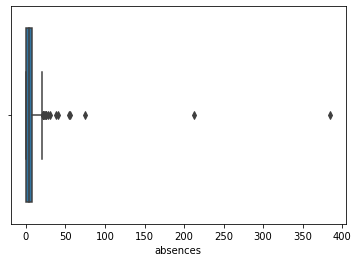

In [ ]:
#поищем выбросы в числовых данных
sns.boxplot(stud['absences'])

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


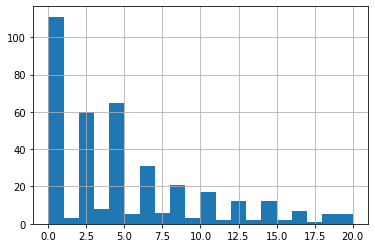

In [9]:
f_IQR(stud,'absences');

In [10]:
#удаляю записи сверх absences > 20 как выбросы
stud.drop(stud[stud['absences'] > 20].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


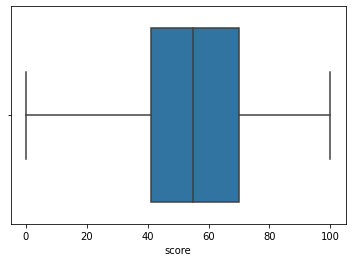

In [11]:
sns.boxplot(stud['score'])

25-й перцентиль: 41.25, 75-й перцентиль: 70.0, IQR: 28.75,  Границы выбросов: [-1.875, 113.125].


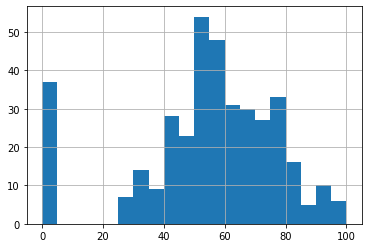

In [12]:
f_IQR(stud,'score');

In [13]:
stud['score'].describe() #распределение близко к нормальному, с небольшим смещением вправо
# полагаю 0 это не выброс

count    378.000000
mean      52.275132
std       22.890779
min        0.000000
25%       41.250000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [14]:
stud.head() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,-6,yes,yes,no,4,3,4,3,6,30
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,-6,yes,yes,no,5,3,3,3,4,30
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,no,no,yes,-6,yes,yes,no,4,3,2,3,10,50
3,GP,F,15,U,GT3,T,4,2,health,other,home,mother,1,3,0,no,yes,yes,yes,yes,-9,yes,yes,yes,3,2,2,5,2,75
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,-6,yes,no,no,4,3,2,5,4,50


In [15]:
#логичекие переменные заменю на 0/1
bool_list=['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

for i in bool_list:
    stud[i+'_b'] = stud[i].apply(lambda x: 1 if x == 'yes' else 0)

In [16]:
#удалим старые столбцы
stud.drop(bool_list, axis = 1, inplace = True)

In [17]:
stud.corr() #посмотрим матрицу коррелияции

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score,schoolsup_b,famsup_b,paid_b,activities_b,nursery_b,higher_b,internet_b,romantic_b
age,1.000000,-0.178544,-0.173245,0.086832,-0.010651,0.217280,0.010651,0.061219,0.049611,0.149460,-0.061529,0.148437,-0.157974,-0.237991,-0.156346,-0.027035,-0.111074,-0.096756,-0.206787,-0.097781,0.133581
Medu,-0.178544,1.000000,0.594081,-0.172479,0.095697,-0.254319,-0.095697,-0.008948,0.045712,0.054035,-0.047271,0.065026,0.212342,-0.030133,0.203637,0.127236,0.113353,0.172058,0.171432,0.186103,0.007647
Fedu,-0.173245,0.594081,1.000000,-0.121623,0.014803,-0.279051,-0.014803,-0.015523,-0.019159,0.036661,0.010513,-0.026101,0.119849,0.048481,0.177602,0.061586,0.121506,0.133270,0.167641,0.117565,-0.002054
traveltime,0.086832,-0.172479,-0.121623,1.000000,-0.082046,0.056727,0.082046,-0.012501,-0.001809,0.045091,-0.044274,-0.035997,-0.052938,0.006634,-0.001349,-0.037284,-0.004431,-0.021584,-0.067415,-0.073863,0.040907
studytime,-0.010651,0.095697,0.014803,-0.082046,1.000000,-0.174359,-1.000000,0.041606,-0.130854,-0.039465,-0.079743,-0.076534,0.119012,0.036231,0.111675,0.229137,0.106014,0.089468,0.174154,0.048750,0.047031
failures,0.217280,-0.254319,-0.279051,0.056727,-0.174359,1.000000,0.174359,-0.031719,0.081508,0.098403,0.087649,0.082667,-0.329721,0.023478,-0.075118,-0.179161,-0.066918,-0.095356,-0.281427,-0.051483,0.085165
"studytime, granular",0.010651,-0.095697,-0.014803,0.082046,-1.000000,0.174359,1.000000,-0.041606,0.130854,0.039465,0.079743,0.076534,-0.119012,-0.036231,-0.111675,-0.229137,-0.106014,-0.089468,-0.174154,-0.048750,-0.047031
famrel,0.061219,-0.008948,-0.015523,-0.012501,0.041606,-0.031719,-0.041606,1.000000,0.167687,0.075419,0.069818,-0.092521,0.066419,0.013620,-0.006396,-0.020159,0.051966,-0.014853,0.014489,0.067577,-0.070392
freetime,0.049611,0.045712,-0.019159,-0.001809,-0.130854,0.081508,0.130854,0.167687,1.000000,0.279047,0.052624,0.086623,0.039375,-0.066287,0.019636,-0.053147,0.053433,-0.053947,-0.070384,0.122824,-0.003881
goout,0.149460,0.054035,0.036661,0.045091,-0.039465,0.098403,0.039465,0.075419,0.279047,1.000000,-0.004674,0.105943,-0.108130,-0.036754,-0.024852,0.023069,0.021330,-0.029802,-0.046330,0.114927,0.025914


In [18]:
# удалим studytime, granular т.к. максимальная отрицательная корреляция с studytime
stud.drop(['studytime, granular'], axis = 1, inplace = True)

stud.corr()['score'].abs().sort_values()

famsup_b        0.006642
activities_b    0.010651
freetime        0.039375
nursery_b       0.048482
traveltime      0.052938
internet_b      0.054196
famrel          0.066419
health          0.074418
absences        0.078062
schoolsup_b     0.091829
goout           0.108130
paid_b          0.111879
studytime       0.119012
Fedu            0.119849
romantic_b      0.138523
age             0.157974
higher_b        0.187994
Medu            0.212342
failures        0.329721
score           1.000000
Name: score, dtype: float64

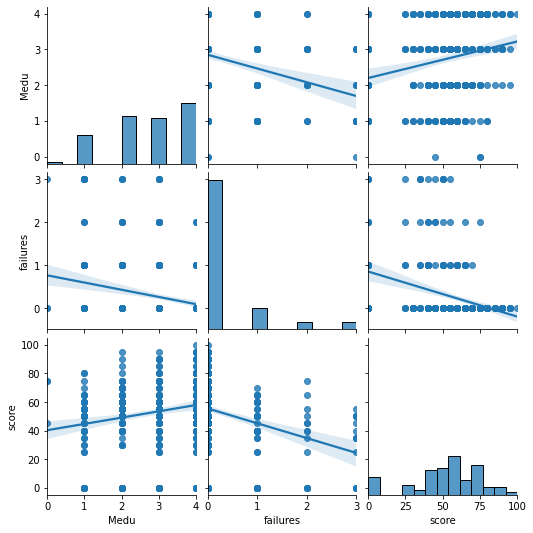

In [19]:
# подготовим и удалим список полей с корреляцией менее 20% 
cor1 = stud.corr()['score'].abs().sort_values()
list_del = cor1[cor1<0.2].reset_index()['index'].to_list()
stud.drop(list_del, axis = 1, inplace = True)

# подготовим список интересных полей и исследуем зависимости
list_num = stud.corr()['score'].abs().sort_values().reset_index()['index'].to_list()
sns.pairplot(stud[list_num],kind='reg')

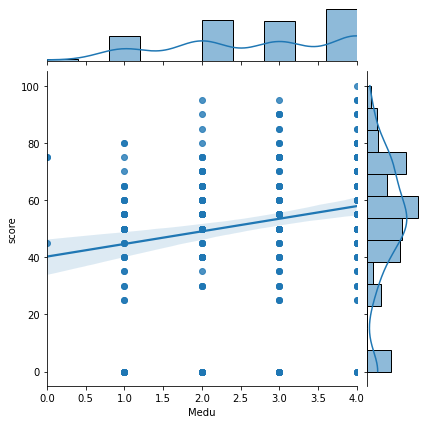

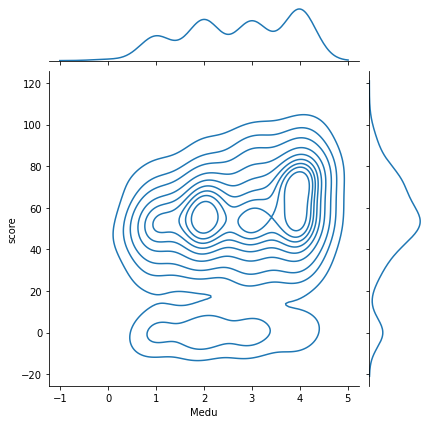

In [20]:
sns.jointplot(x='Medu',y='score',data=stud,kind='reg')
sns.jointplot(x='Medu',y='score',data=stud,kind='kde')

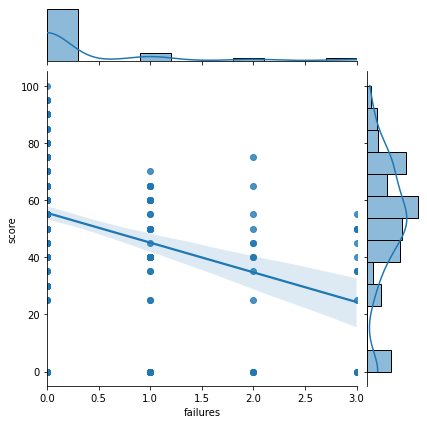

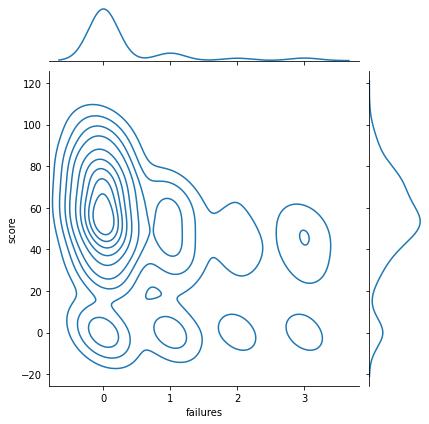

In [21]:
sns.jointplot(x='failures',y='score',data=stud,kind='reg')
#sns.pairplot(stud,hue = 'smoker')
sns.jointplot(x='failures',y='score',data=stud,kind='kde')

In [22]:
# попробуем добавить дамми переменные
dum_list = []
for i in stud.columns:
        if stud[i].dtype == 'object':
            dum_list.append(i)
stud2 = (pd.get_dummies(stud, columns = dum_list, drop_first = True))

In [23]:
# смотрим результат
lookin(stud2)

Medu :  int64 : [4 1 3 2 0]
failures :  int64 : [0 3 2 1]
score :  int64 : [ 30  50  75  55  95  45  60  70  80  25  40  85  90  65 100  35   0]
school_MS :  uint8 : [0 1]
sex_M :  uint8 : [0 1]
address_U :  uint8 : [1 0]
famsize_LE3 :  uint8 : [0 1]
Pstatus_T :  uint8 : [0 1]
Mjob_health :  uint8 : [0 1]
Mjob_other :  uint8 : [0 1]
Mjob_services :  uint8 : [0 1]
Mjob_teacher :  uint8 : [0 1]
Fjob_health :  uint8 : [0 1]
Fjob_other :  uint8 : [0 1]
Fjob_services :  uint8 : [0 1]
Fjob_teacher :  uint8 : [1 0]
reason_home :  uint8 : [0 1]
reason_other :  uint8 : [0 1]
reason_reputation :  uint8 : [0 1]
guardian_mother :  uint8 : [1 0]
guardian_other :  uint8 : [0 1]


In [24]:
stud2.corr()['score'].abs().sort_values()

Fjob_other           0.011058
guardian_mother      0.020449
Fjob_health          0.030158
reason_home          0.033651
reason_other         0.036864
Fjob_services        0.038987
school_MS            0.041945
Pstatus_T            0.048721
Mjob_services        0.053584
Mjob_teacher         0.056929
Mjob_other           0.062582
guardian_other       0.066065
Fjob_teacher         0.066760
famsize_LE3          0.070843
reason_reputation    0.104846
Mjob_health          0.111079
sex_M                0.111996
address_U            0.123891
Medu                 0.212342
failures             0.329721
score                1.000000
Name: score, dtype: float64

In [25]:
# чуда не произошло, максимальный уровень корреляции по модулю менее 0,33. хотя в рейтинге на 3 месте
# появился показатель address_U  и если профессия мамы - учитель
# подготовим и удалим список полей с корреляцией менее 10%
cor1 = stud2.corr()['score'].abs().sort_values()
list_del = cor1[cor1<0.1].reset_index()['index'].to_list()
stud2.drop(list_del, axis = 1, inplace = True)

In [26]:
# смотрим результат
lookin(stud2)

Medu :  int64 : [4 1 3 2 0]
failures :  int64 : [0 3 2 1]
score :  int64 : [ 30  50  75  55  95  45  60  70  80  25  40  85  90  65 100  35   0]
sex_M :  uint8 : [0 1]
address_U :  uint8 : [1 0]
Mjob_health :  uint8 : [0 1]
reason_reputation :  uint8 : [0 1]


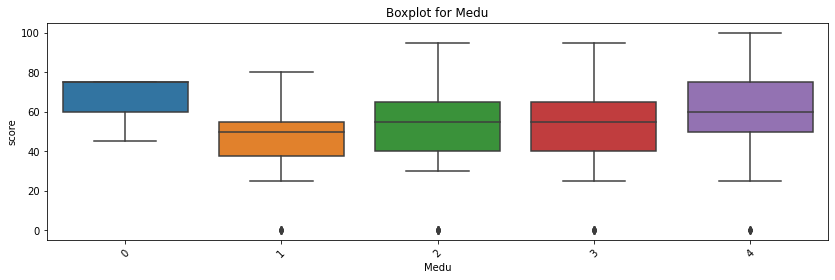

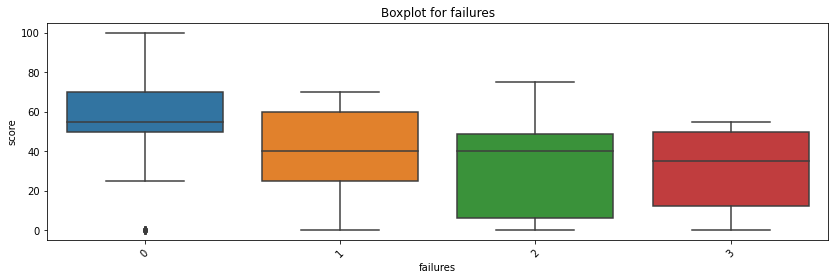

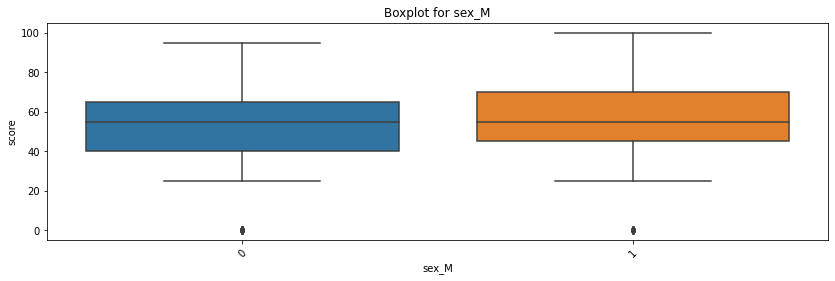

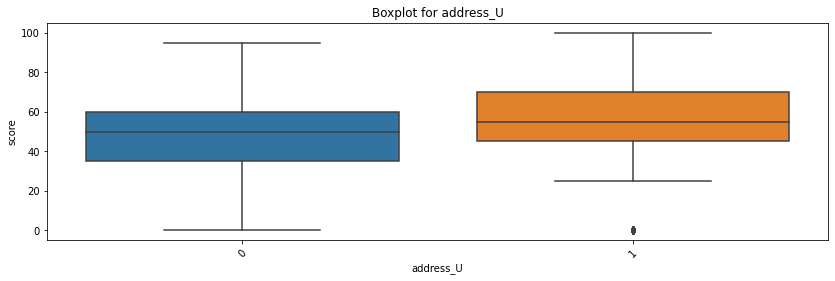

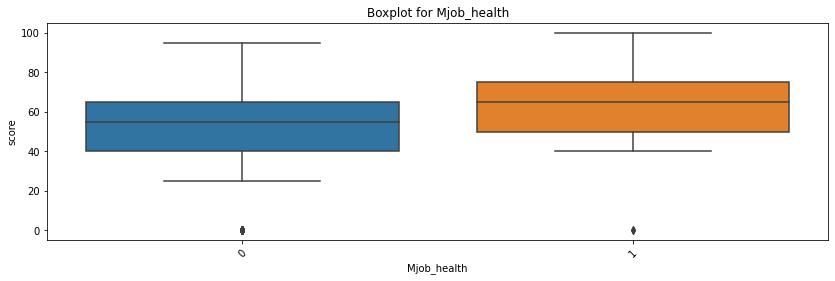

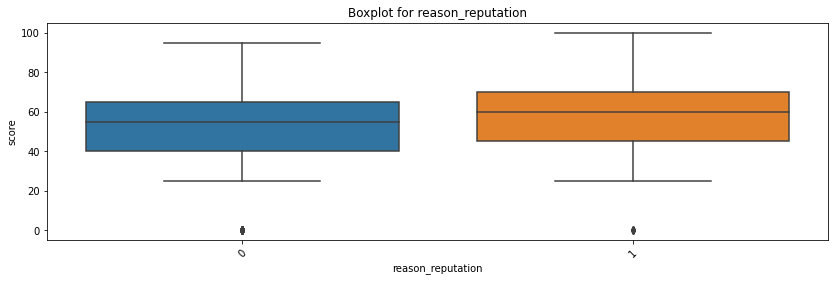

In [27]:
# генерация дамми не дала особо значимых результатов. Вернёмся немного назад и обратимся к номинативными показателям через 
# boxplot и т-тест
for col in ['Medu', 'failures', 'sex_M','address_U','Mjob_health','reason_reputation']:
    get_boxplot(col)

In [28]:
# визуально, графики подтвердили более высокие оценки если мама врач или мама 
# по образованию учитель или городской или парень или выбор школы по репутации и минимум пропусков
# проверим ттестом

In [29]:
for col in ['Medu', 'failures', 'sex_M','address_U','Mjob_health','reason_reputation']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки sex_M
Найдены статистически значимые различия для колонки address_U
Найдены статистически значимые различия для колонки Mjob_health
Найдены статистически значимые различия для колонки reason_reputation


In [30]:
# ттест подтвердил статистическую значимость отобранных показателей

list_target = ['Medu', 'failures', 'sex_M','address_U','Mjob_health','reason_reputation','score']
stud_final = stud2[list_target]

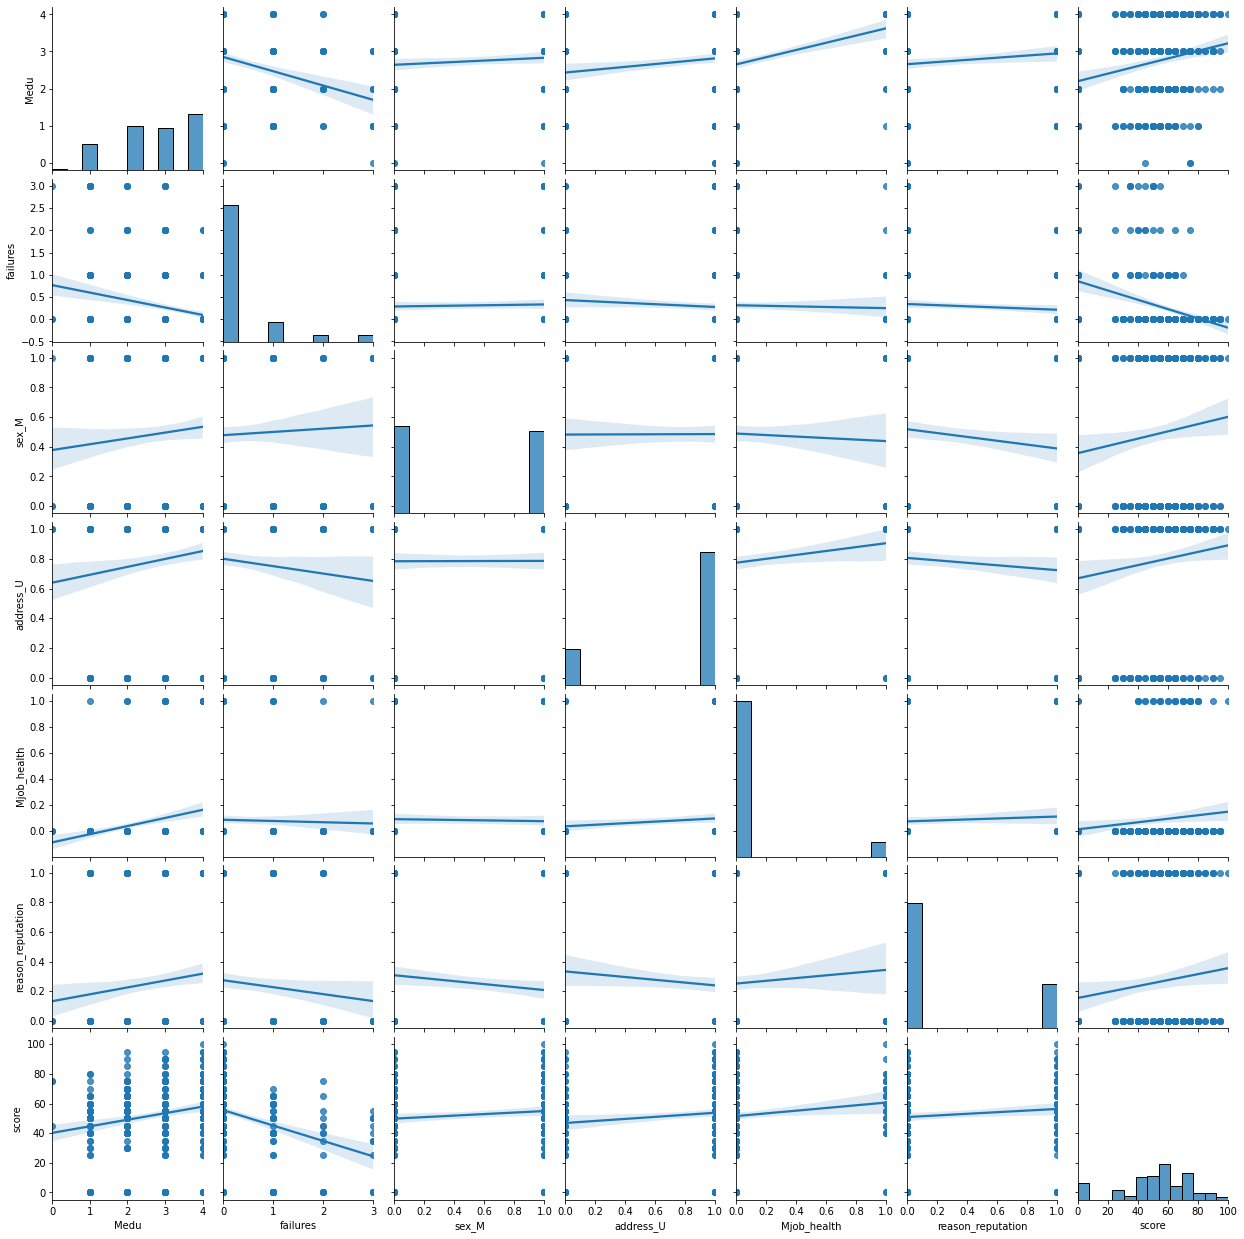

In [31]:
sns.pairplot(stud_final,kind='reg')